In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

In [2]:
df = pd.read_csv('Diwali-Sales-Data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
df['User_ID'].nunique()

3755

In [7]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [8]:
df['State'].nunique()

16

In [9]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.drop(['Status', 'unnamed1'], inplace = True, axis = 1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [11]:
df.dropna(inplace=True)

<Axes: >

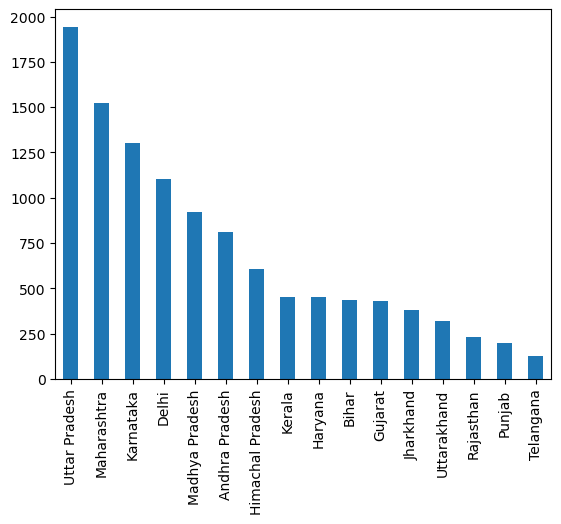

In [12]:
state_count = df['State'].value_counts()
state_count.plot(kind = 'bar')

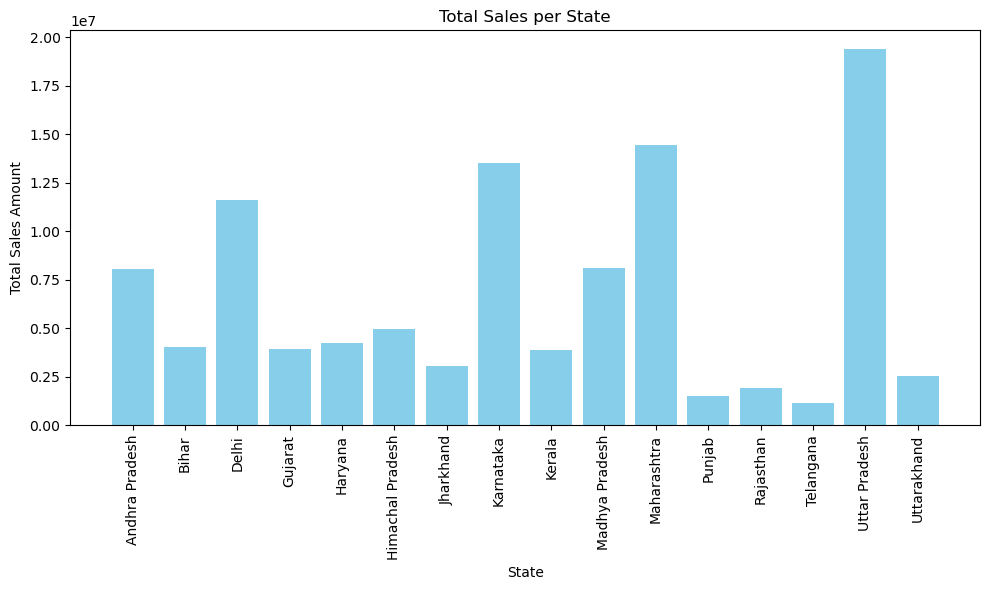

In [13]:
total_sales_per_state = df.groupby('State')['Amount'].sum().reset_index()
total_sales_per_state.columns = ['State', 'Total_Sales']

# Bar chart for total sales by state
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_state['State'], total_sales_per_state['Total_Sales'], color='skyblue')
plt.title('Total Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The output presents the total sales amounts for each state in the dataset. Here are some insights:

- **Highest Sales**: Uttar Pradesh has the highest total sales amount at approximately ₹19,374,968, indicating a strong market presence or customer engagement in that region.
- **Second Highest**: Maharashtra follows closely with total sales of ₹14,427,543, also showcasing significant activity.
- **Other Notable States**: Karnataka and Delhi also report high sales figures of ₹13,523,540 and ₹11,603,819.45, respectively, highlighting these states as key contributors to overall sales.
- **Lower Sales States**: States like Punjab and Telangana show lower total sales amounts, with figures of ₹1,525,800 and ₹1,151,490, suggesting potential areas for growth or increased marketing efforts.

This information is valuable for identifying strong markets and those that may require more attention or strategy adjustments.


# Average Order Value per State
The average order value (AOV) for each state is determined by computing the ratio of the total sales revenue to the total number of orders within that state. This metric provides valuable insights into customer spending patterns, reflecting the typical expenditure per transaction across different regions. By analyzing AOV variations among states, businesses can refine pricing strategies, optimize marketing and promotional campaigns, and enhance resource allocation to maximize profitability and customer engagement.

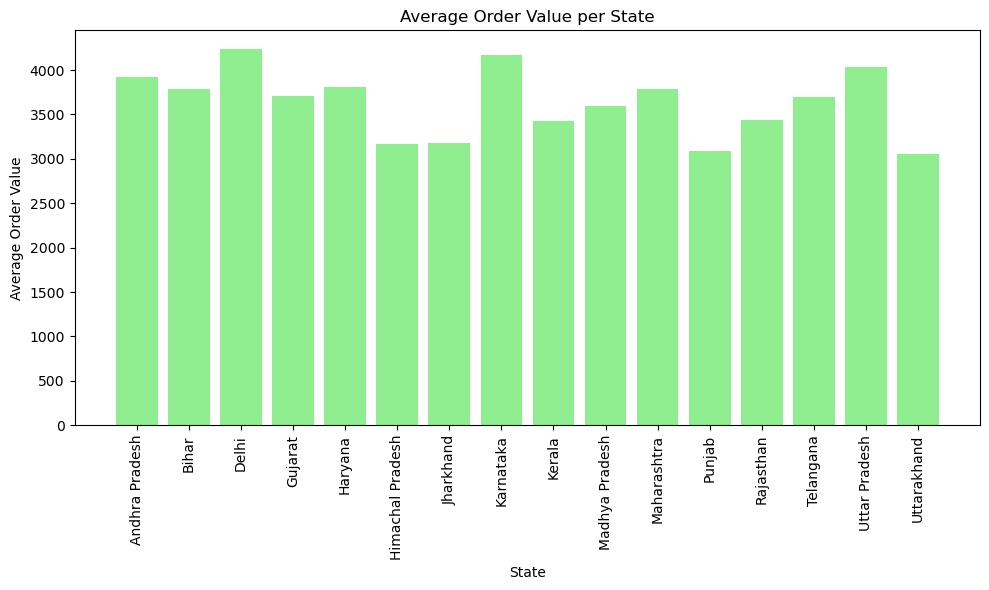

In [14]:
average_order_value = df.groupby('State').agg({'Amount': 'sum', 'Orders': 'sum'}).reset_index()
average_order_value['Average_Order_Value'] = average_order_value['Amount'] / average_order_value['Orders']
average_order_value = average_order_value[['State', 'Average_Order_Value']]

# Bar chart for average order value by state
plt.figure(figsize=(10, 6))
plt.bar(average_order_value['State'], average_order_value['Average_Order_Value'], color='lightgreen')
plt.title('Average Order Value per State')
plt.xlabel('State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
average_order_value

,State,Average_Order_Value
0,Andhra Pradesh,3918.647972
1,Bihar,3787.906780
2,Delhi,4234.970602
3,Gujarat,3701.765478
4,Haryana,3805.387737
5,Himachal Pradesh,3165.413265
6,Jharkhand,3175.714586
7,Karnataka,4173.932099
8,Kerala,3425.234820
9,Madhya Pradesh,3597.309947


#### Insights on average order value per state

1. **Highest Average Order Value**: Delhi has the highest average order value at approximately ₹4,235, indicating that customers in this state tend to spend more per order compared to other regions. This may suggest a higher purchasing power or a preference for premium products.

2. **Lowest Average Order Value**: Uttarakhand has the lowest average order value at around ₹3,059. This could indicate budget-conscious spending habits among consumers in this state or a lower average price point for products sold.

3. **Mid-range Values**: States like Andhra Pradesh and Karnataka show average order values close to ₹3,919 and ₹4,174, respectively. This suggests that these regions have a healthy level of consumer spending, which can be leveraged for targeted marketing strategies.

4. **Consistency Across States**: Most states have average order values ranging from ₹3,000 to ₹4,300, indicating a relatively consistent spending behavior among consumers across different regions, with minor fluctuations based on local market conditions.

5. **Opportunity for Growth**: The average order values in states like Himachal Pradesh and Jharkhand are lower (around ₹3,165 and ₹3,176). This presents an opportunity for businesses to explore strategies to increase the average transaction size, such as promotions or bundling offers.


# Orders by Gender
This analysis quantifies the total number of orders placed by each gender within the dataset, offering insights into the distribution of purchasing behavior across different demographic groups. By representing this data in a pie chart, we can effectively visualize the proportion of orders attributed to each gender, facilitating a clearer understanding of consumer trends. These insights can be leveraged to develop targeted marketing strategies, optimize product offerings, and enhance customer engagement based on demographic preferences.

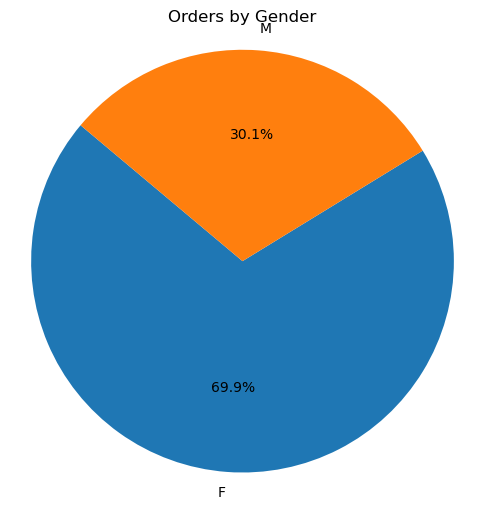

In [16]:
# Orders by Gender
orders_by_gender = df.groupby('Gender')['Orders'].sum().reset_index()

# Pie chart for orders by gender
plt.figure(figsize=(6, 6))
plt.pie(orders_by_gender['Orders'], labels=orders_by_gender['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Orders by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

#### Key insights
The data reveals that female customers (F) made significantly more orders (19,548) than male customers (M) with 8,433 orders. This indicates stronger purchasing engagement from females, suggesting that marketing strategies could be tailored to better target this demographic.


# Orders by Age Group
This analysis examines the distribution of orders across different age groups to assess customer engagement and purchasing behavior within various demographic segments. By identifying which age groups contribute the most to total orders, businesses can refine targeted marketing strategies, personalize promotional efforts, and optimize product offerings to better align with consumer preferences and demand patterns.

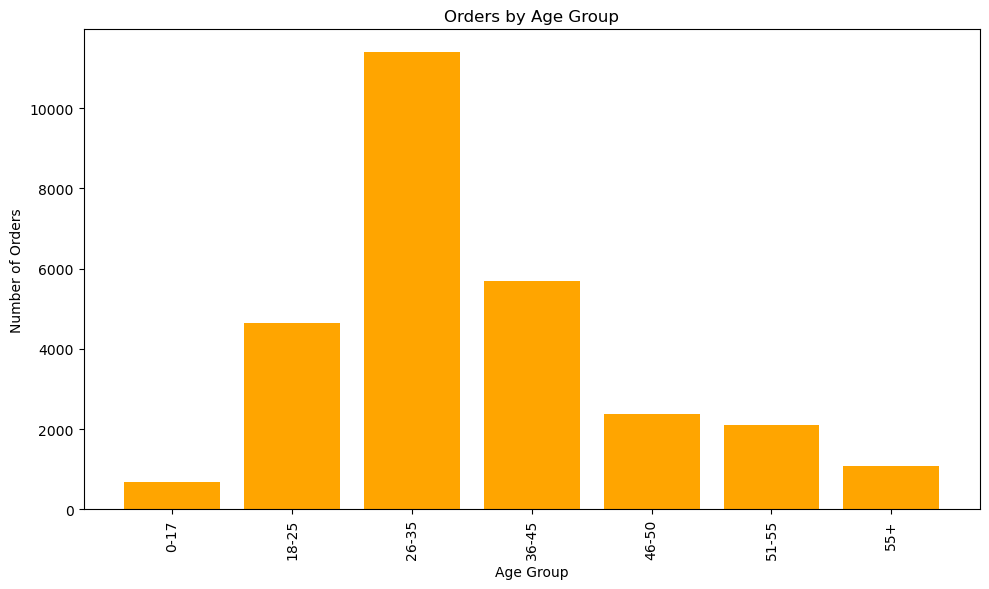

In [17]:
# Orders by Age Group
orders_by_age_group = df.groupby('Age Group')['Orders'].sum().reset_index()

# Bar chart for orders by age group
plt.figure(figsize=(10, 6))
plt.bar(orders_by_age_group['Age Group'], orders_by_age_group['Orders'], color='orange')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Insights from orders by age group

The orders distribution across age groups reveals that:

- The **26-35 age group** is the largest contributor to orders, indicating strong purchasing power and engagement.
- **Young adults (18-25)** also show notable activity, suggesting opportunities for trend-driven marketing.
- Orders from **middle-aged groups (36-45)** reflect a steady market presence, while older segments (46+) exhibit lower engagement, highlighting potential areas for targeted marketing efforts.
- Overall, focusing on the younger and middle-aged demographics could enhance sales and customer retention strategies.


# Analysis of Top-Selling Products
This analysis focuses on identifying the best-selling products by evaluating the total number of orders per item. By aggregating order counts, we can determine which products are driving customer demand and engagement. These insights are instrumental in optimizing inventory management, refining marketing strategies, and designing targeted product promotions to maximize sales performance.

## Key Insights from Top-Selling Products
**Consumer Preferences & Market Trends**: Identifying top-selling products provides valuable insights into customer preferences and emerging market trends, aiding in strategic decision-making.

**Inventory Optimization**: Recognizing high-demand products allows businesses to streamline stock levels, ensuring adequate supply while minimizing overstock risks.

**Marketing & Promotional Strategies**: Consistently top-performing products present opportunities for expanding related product lines, creating bundled offerings, or implementing strategic promotional campaigns to drive further engagement and revenue growth.

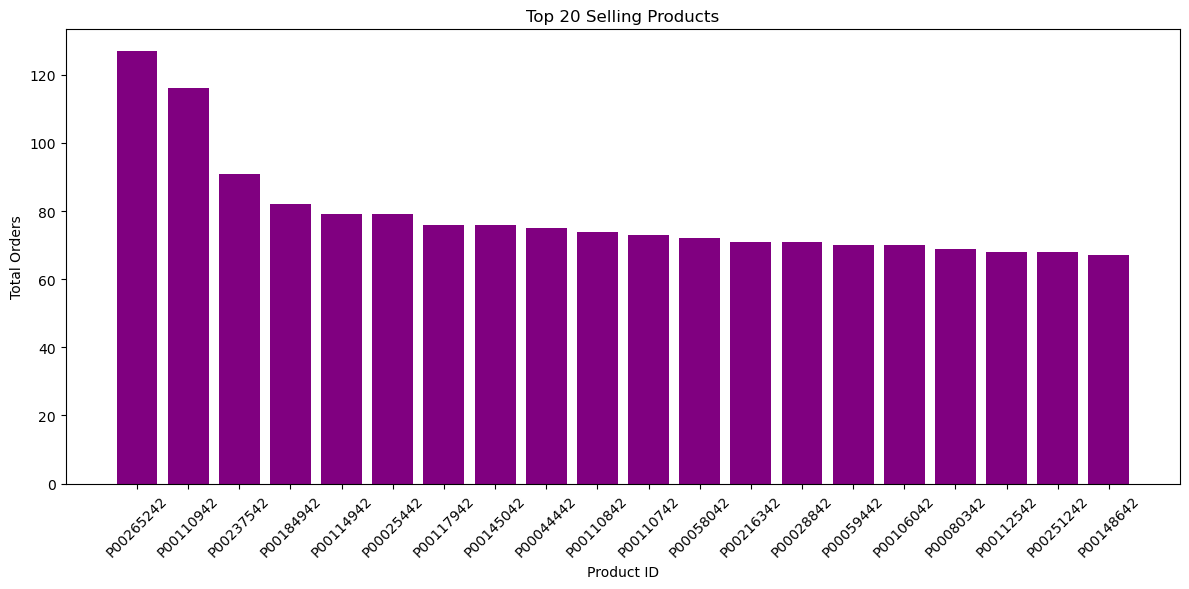

In [18]:
# Top-selling products
top_products = df.groupby('Product_ID')['Orders'].sum().reset_index()
top_products.columns = ['Product_ID', 'Total_Orders']
top_products = top_products.sort_values(by='Total_Orders', ascending=False)

# Get the top 29 products
top_20_products = top_products.head(20)

# Bar chart for top-selling products
plt.figure(figsize=(12, 6))
plt.bar(top_20_products['Product_ID'], top_20_products['Total_Orders'], color='purple')
plt.title('Top 20 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights from top-selling products output

1. **Top Product Performance**: The product with **ID P00265242** leads with **127 orders**, indicating strong demand and potentially effective marketing or popularity among customers.
   
2. **Consistent Demand**: Several products, such as **P00110942** and **P00237542**, have also shown significant order volumes (**116** and **91** orders, respectively), suggesting that they are well-received by customers.

3. **Order Volume Distribution**: The top 20 products have order totals ranging from **67 to 127**, highlighting a competitive landscape where even the lowest-selling products in this group are still generating substantial interest.

4. **Strategic Focus**: Identifying these top products can guide strategic decisions such as increasing stock levels, enhancing visibility through targeted marketing, or exploring potential collaborations with suppliers.


# Sales by Product Category Analysis
This analysis examines sales performance across different product categories by aggregating total orders and revenue generated within each category. By identifying which categories contribute the most to overall sales, businesses can gain valuable insights into consumer preferences and purchasing trends.

## Key Insights & Applications

**Demand Assessment**: Understanding high-performing categories helps prioritize inventory planning and supply chain management to prevent stock shortages or overstocking.

**Marketing Strategy Optimization**: Categories with lower sales may benefit from targeted marketing efforts, promotional campaigns, or pricing adjustments to enhance customer interest.

**Product Development & Expansion**: Identifying consistently strong categories can guide businesses in expanding product lines, introducing complementary items, or bundling strategies to maximize revenue potential.

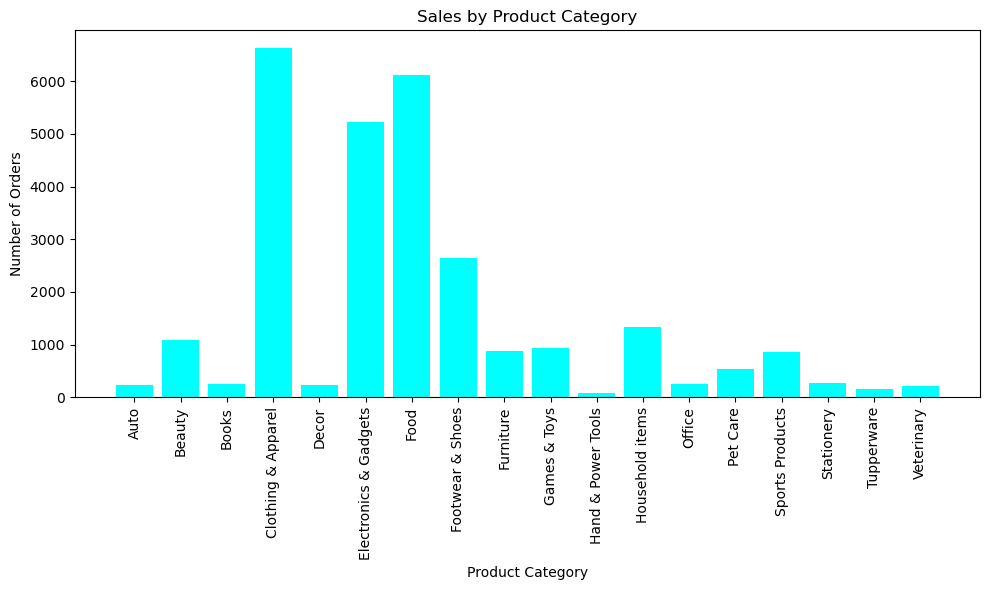

In [19]:
# Sales by Product Category
sales_by_category = df.groupby('Product_Category').agg({'Orders': 'sum', 'Amount': 'sum'}).reset_index()

# Bar chart for sales by product category
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category['Product_Category'], sales_by_category['Orders'], color='cyan')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Insights from sales by product category output

1. **Food** leads in both orders (6,110) and revenue (\$33.9M), showing strong consumer demand.
2. **Electronics & Gadgets** (5,226 orders, \$15.6M) and **Clothing & Apparel** (6,634 orders, \$16.5M) also perform well, indicating popular consumer interests.
3. **Footwear & Shoes** generates substantial sales (\$15.6M) with 2,646 orders.
4. **Beauty** (1,086 orders, \$1.96M) and **Sports Products** (870 orders, \$3.6M) show potential for growth.
5. Categories like **Auto** (239 orders, \$1.96M) and **Hand & Power Tools** (80 orders, \$405K) are underperforming and may need targeted marketing.


# Total Orders by Occupation
This analysis examines the distribution of total orders across various occupations to gain insights into consumer behavior and purchasing patterns. Understanding which occupational groups contribute the most to overall sales enables businesses to develop targeted marketing strategies and refine product offerings to better align with customer needs.

## Key Insights & Applications

**Consumer Behavior Analysis**: Identifying high-order occupations helps businesses understand purchasing power and product preferences across different professional groups.

**Personalized Marketing Strategies**: Tailoring promotions and advertisements based on occupational trends can enhance engagement and conversion rates.

**Product & Service Alignment**: Insights from occupational order trends can inform product development, ensuring offerings align with the needs and interests of specific workforce segments.

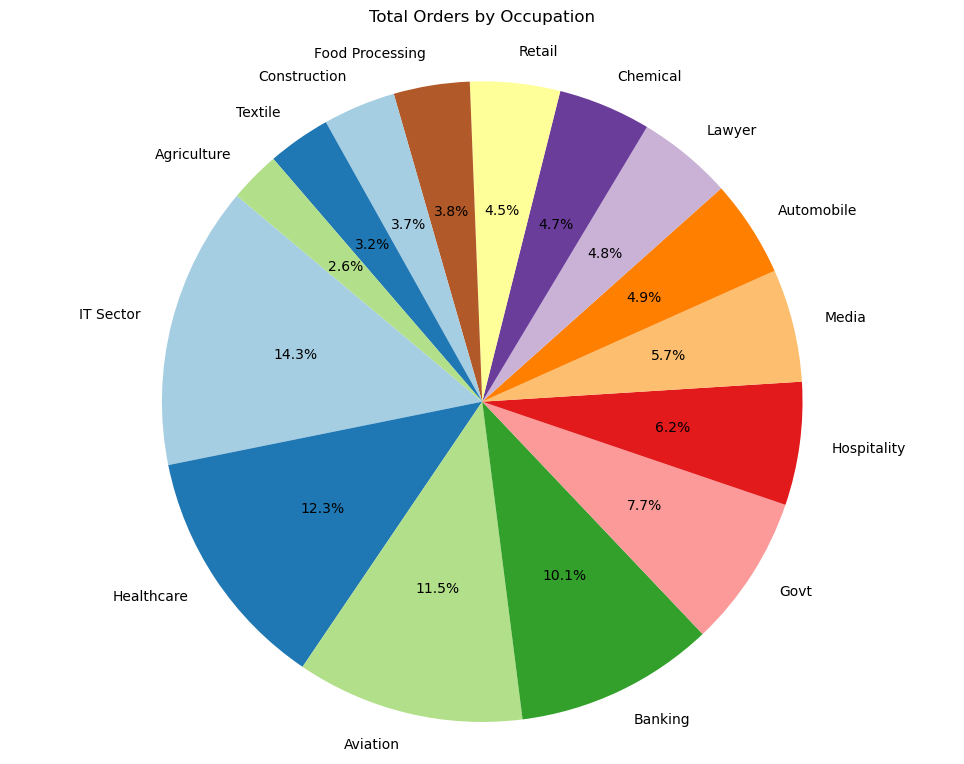

In [20]:
occupation_orders = df.groupby('Occupation')['Orders'].sum().reset_index()
occupation_orders.columns = ['Occupation', 'Total_Orders']

# Sort values by Total Orders
occupation_orders = occupation_orders.sort_values(by='Total_Orders', ascending=False)

# Pie chart for orders by occupation
plt.figure(figsize=(10, 8))
plt.pie(
    occupation_orders['Total_Orders'], 
    labels=occupation_orders['Occupation'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title('Total Orders by Occupation', pad=20)  # Add padding to title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout(pad=2)  # Add some padding around the plot

plt.show()

The analysis of total orders by occupation reveals the following insights:

- **IT Sector** leads with the highest number of orders (3,997), indicating a strong consumer engagement in technology-related products or services.
- **Healthcare** and **Aviation** follow closely, with orders of 3,455 and 3,215, respectively, highlighting significant demand in these critical sectors.
- Other notable occupations include **Banking** (2,817), **Government** (2,155), and **Hospitality** (1,739), each demonstrating considerable order volumes.
- Occupations such as **Retail** (1,270) and **Construction** (1,025) also contribute to the overall order count, suggesting diverse consumer interests across various fields.


# Order Distribution Analysis
This analysis examines the distribution of order quantities by visualizing the data using a histogram combined with a kernel density estimate (KDE). This approach provides a comprehensive view of customer purchasing behavior, particularly the frequency and variability of different order sizes.

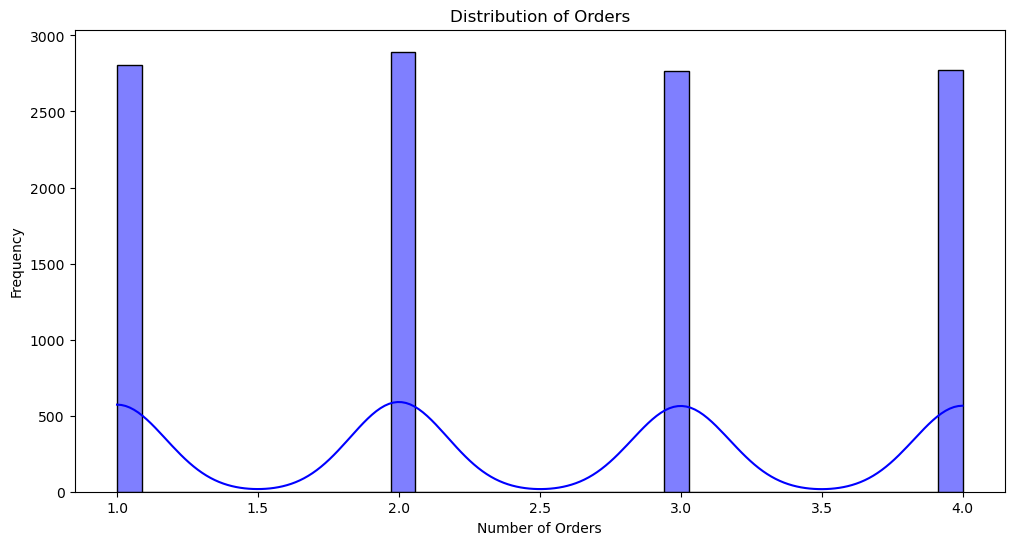

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Orders'], kde=True, color='blue')
plt.title('Distribution of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show() 

### Insights from order count data

1. **Popular Order Size**: The most common order size consists of 2 orders, accounting for 2,893 instances. This suggests that many customers prefer ordering multiple items in a single transaction.
2. **Balanced Distribution**: The counts for orders of 1 (2,808), 3 (2,765), and 4 (2,773) indicate a relatively balanced distribution of order sizes, reflecting diverse customer preferences.
3. **Focus on Order Optimization**: Given that most orders fall between 1 to 4 items, strategies to encourage larger order sizes, such as bundle offers or discounts on higher quantities, could effectively increase sales.


### Amount distribution

We are visualizing the distribution of transaction amounts in our dataset to understand the spending behavior of customers. This histogram will help identify common spending ranges and any potential outliers that may exist in the data. The addition of a Kernel Density Estimate (KDE) curve provides a smoother representation of the distribution, allowing for better insights into the data's underlying patterns.


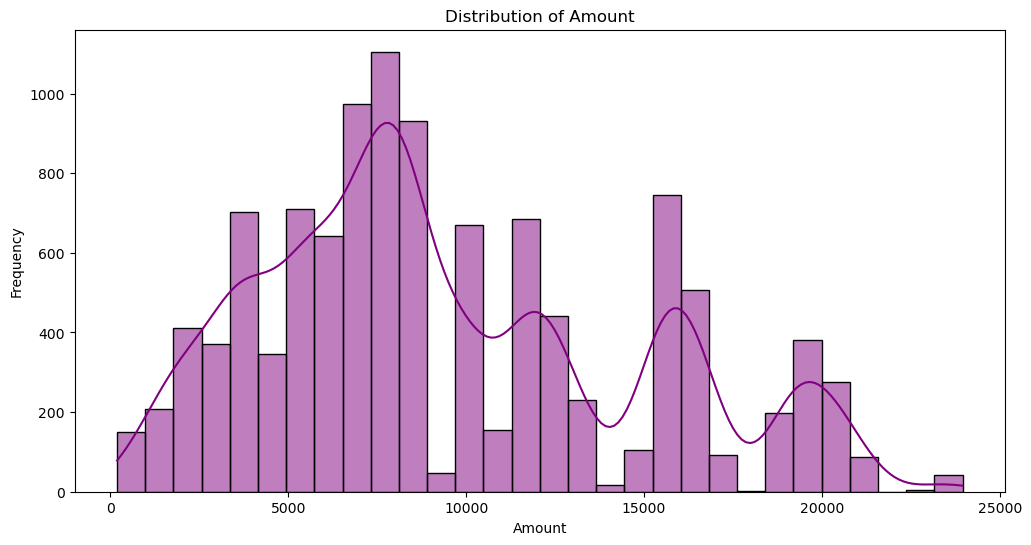

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=30, kde=True, color='purple')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### Correlation heatmap

We are generating a correlation heatmap to visualize the relationships between various numeric columns in our dataset, including Age, Marital Status, Orders, and Amount. This heatmap will help us identify potential correlations, such as how age or marital status may influence order volume and spending amounts. Understanding these relationships can guide our analysis and inform marketing strategies.


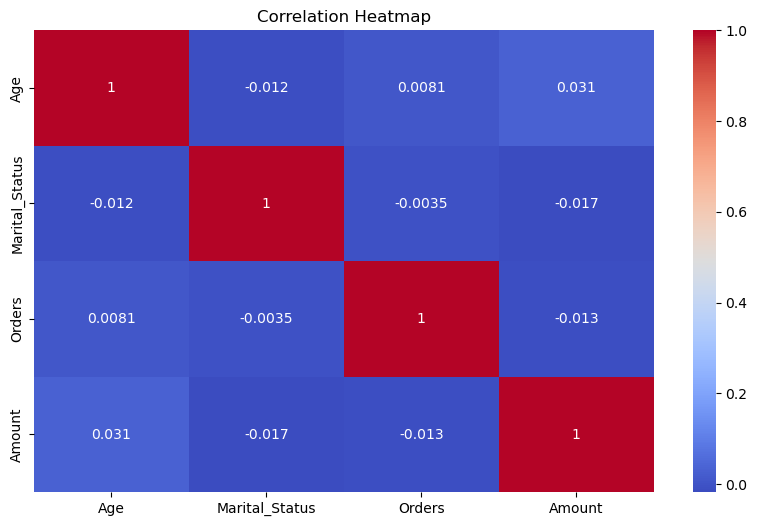

In [24]:
numeric_columns = ['Age', 'Marital_Status', 'Orders', 'Amount']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Key insights
The correlation heatmap indicates weak relationships among Age, Marital Status, Orders, and Amount, with all coefficients near zero. Age shows a slight positive correlation (0.031) with Amount, suggesting older customers may spend marginally more. Overall, these variables do not significantly influence each other, indicating that other factors may drive sales and order frequency.



### Total count of each gender based on marital status

This bar chart visualizes the distribution of orders based on marital status and gender. It shows that **Married** individuals place more orders than those who are **Not Married**, with **Females** particularly leading in the **Married** category. This insight can inform targeted marketing strategies to engage these demographics effectively, especially during festive occasions.


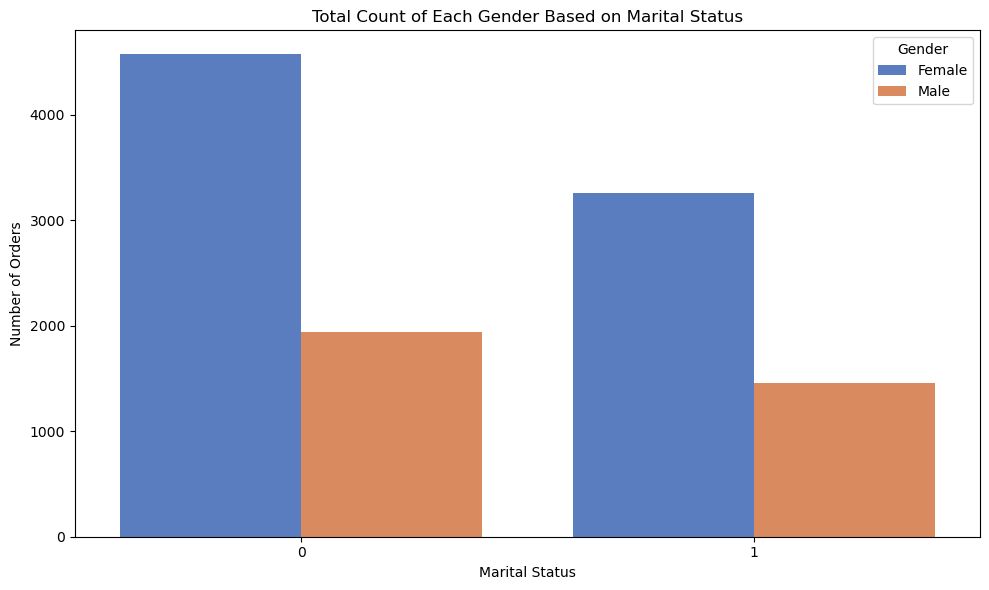

In [25]:
ms = df.groupby(['Marital_Status', 'Gender']).size().reset_index(name='counts').sort_values('counts', ascending=False)

# Replace values for better readability
ms['Marital_Status'] = ms['Marital_Status'].replace({'0': 'Not Married', '1': 'Married'})
ms['Gender'] = ms['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=ms, x='Marital_Status', y='counts', hue='Gender', palette='muted')

# Update layout for better aesthetics
plt.title("Total Count of Each Gender Based on Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.tight_layout()

# Show the figure
plt.show()

#### Key insights

The data indicates that Females are more active in placing orders compared to Males, regardless of marital status. Specifically, 4,573 orders were recorded from Not Married Females, while 1,945 orders were placed by Not Married Males. Among Married individuals, 3,259 orders were attributed to Married Females, compared to 1,462 orders from Married Males. This suggests a strong engagement from female customers, particularly those who are not married, presenting an opportunity for targeted marketing strategies.








### Box plot of order amounts by state

This analysis explores the distribution of order amounts across different states. Using a box plot, we can observe the spread of order values, including medians and outliers, which helps in identifying any states with particularly high or low order amounts. This visualization can guide regional strategies by highlighting states with significant spending patterns.


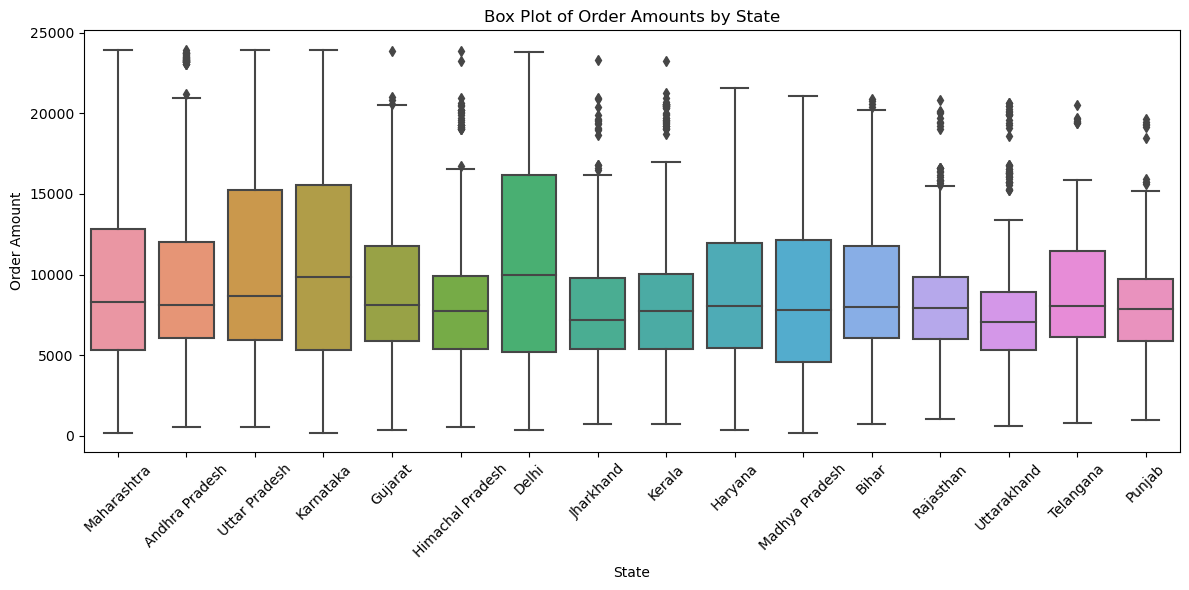

In [26]:
# Box plot for Amount by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Amount', data=df)
plt.title('Box Plot of Order Amounts by State')
plt.xlabel('State')
plt.ylabel('Order Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights

The box plot reveals significant variations in order amounts across different states:

- **Maharashtra and Karnataka** show higher median order amounts, indicating potentially stronger purchasing power or higher-value orders in these states.
- **Uttar Pradesh and Gujarat** also have high maximum order values, though their median values are lower than Maharashtra.
- **States like Jharkhand, Kerala, and Punjab** show relatively lower order amounts overall, with smaller spreads, indicating more consistent but lower-value purchases.
- Several states have **outliers**, suggesting occasional high-value orders, which could indicate specific segments of affluent customers or bulk orders in those regions.


### Orders by age group and product category

This analysis aims to identify **purchasing trends across different age groups and product categories**. By visualizing the total orders, we can understand which age groups favor certain categories, allowing for more targeted marketing and product recommendations.


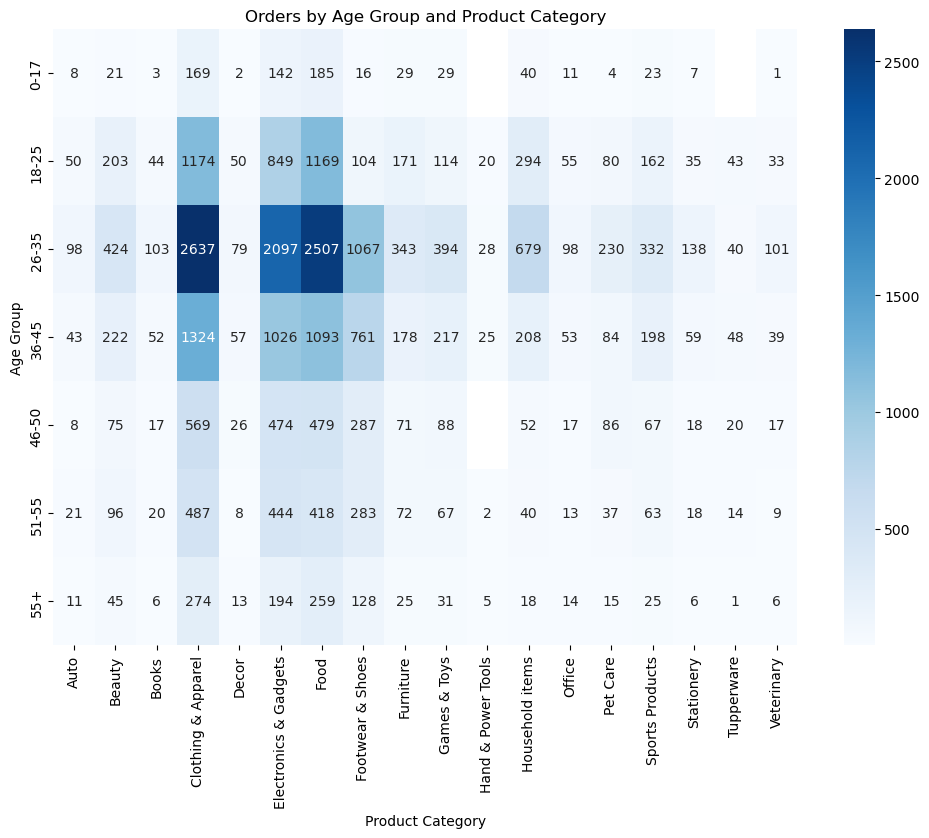

In [27]:
# Group by Age Group and Product Category
multi_group_orders = df.groupby(['Age Group', 'Product_Category'])['Orders'].sum().unstack()

# Heatmap for multivariate analysis
plt.figure(figsize=(12, 8))
sns.heatmap(multi_group_orders, cmap='Blues', annot=True, fmt='g')
plt.title('Orders by Age Group and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.show()

### Total orders by zone

In this section, we analyze the total number of orders segmented by different zones in our dataset. We first group the data by the Zone column and sum the Orders for each zone to obtain the total number of orders per zone. This aggregated data is then visualized using a grouped bar chart, which allows us to easily compare the total orders across various zones.


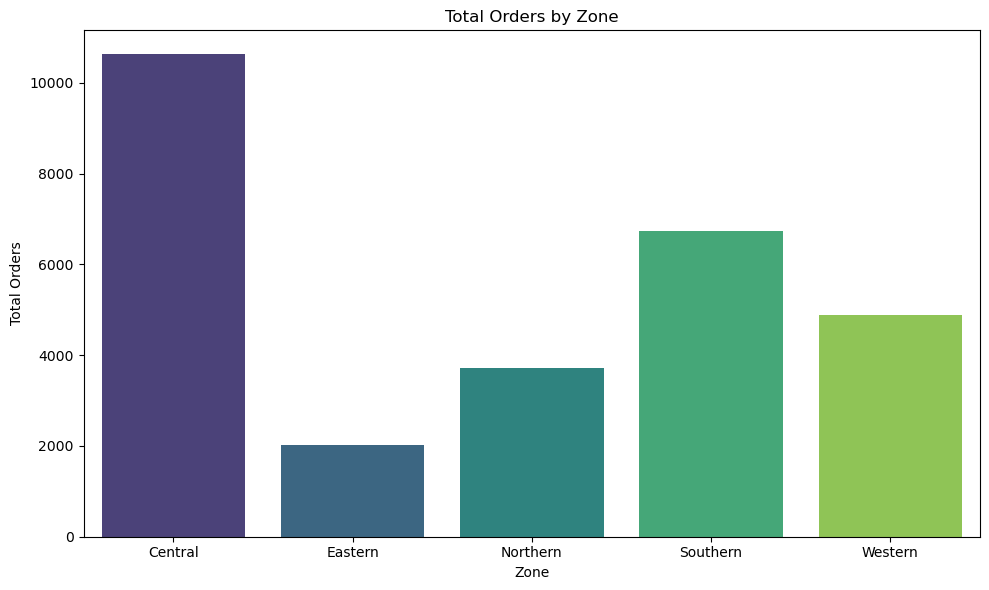

In [28]:
zone_orders = df.groupby('Zone')['Orders'].sum().reset_index()
zone_orders.columns = ['Zone', 'Total_Orders']

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=zone_orders, x='Zone', y='Total_Orders', palette='viridis')

# Update layout for better aesthetics
plt.title("Total Orders by Zone")
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.tight_layout()

# Show the figure
plt.show()

#### Key insights

1. **Central Zone Dominance**: The Central zone leads with **10,623** orders, indicating strong engagement and spending during Diwali.

2. **Low Engagement in Eastern Zone**: The Eastern zone's **2,015** orders suggest potential cultural differences or market challenges.

3. **Diverse Regional Practices**: Northern (**3,727**) and Southern (**6,740**) zones show moderate participation, indicating varied Diwali observances.

4. **Logistics Focus**: Concentrated orders in the Central zone highlight the need for efficient supply chain management to meet high demand.

5. **Tailored Marketing**: Localized marketing strategies can enhance appeal and drive sales by aligning with regional customs and preferences.


### Total sales amount by product category

In this analysis, we are aggregating the total sales amounts for each product category to identify trends in sales performance during Diwali.


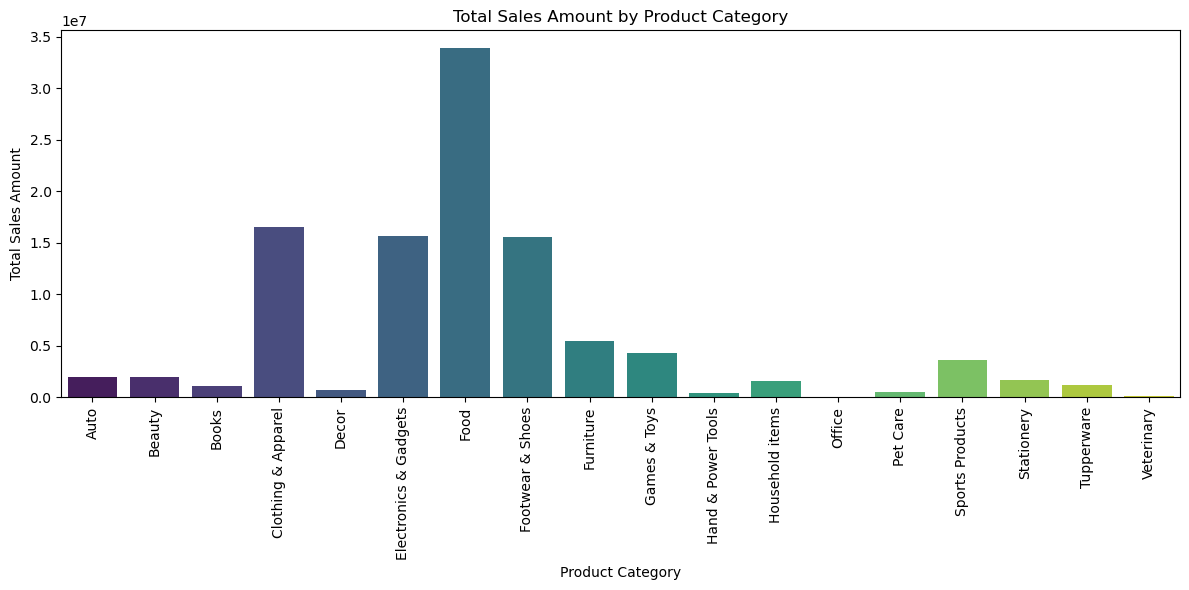

In [29]:
category_sales = df.groupby('Product_Category')['Amount'].sum().reset_index()
category_sales.columns = ['Product_Category', 'Total_Sales']

# Bar chart for total sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Product_Category', y='Total_Sales', palette='viridis')
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Key insights from total sales by product category during Diwali

1. **Top Category - Food**: Leads with ₹33,933,883.50, reflecting high demand for festive treats.
2. **Strong Electronics Sales**: Generated ₹15,643,846, showing popularity for tech gifts.
3. **Clothing & Apparel**: Achieved ₹16,495,019 in sales, indicating a trend towards new attire for celebrations.
4. **Footwear Demand**: Totaling ₹15,575,209.45, suggesting shoppers prioritize stylish footwear.
5. **Underperforming Categories**: Office supplies (₹81,936) and veterinary products (₹112,702) show low interest, signaling a need for revised marketing.


## Introduction to Clustering for Targeted Marketing

In data-driven marketing, identifying and analyzing customer segments is crucial for optimizing targeted promotions and enhancing customer satisfaction. By applying **clustering techniques** to customer data, we can segment individuals based on their **demographics and purchasing behavior**, enabling the development of personalized marketing strategies that improve engagement and conversion rates.

### **Benefits of Clustering in Marketing**
Clustering provides valuable insights that enhance marketing effectiveness by:

1. **Personalization**: Enables the delivery of customized marketing messages that align with the preferences and behaviors of each segment.
2. **Resource Optimization**: Facilitates efficient allocation of marketing resources by prioritizing high-value customer segments.
3. **Customer Retention**: Helps tailor promotions and offers that foster customer engagement and long-term loyalty.

In this project, clustering is applied to **Diwali sales data** to explore **demographic and purchasing behavior patterns**. The goal is to identify key customer segments, recognize high-spending groups, and develop data-driven targeted marketing strategies.

---

## **Code Overview**
This section outlines the methodology for preprocessing and clustering customer data to derive actionable insights.

### **1. Data Preprocessing**
- Load and clean the dataset by **removing irrelevant columns** and handling **missing values**.
- Select clustering features that include **demographic and categorical attributes**, excluding `Amount` to ensure clustering is based on purchasing behavior rather than expenditure.

### **2. Feature Transformation**
- **Numerical Features**: Variables such as `Age` are standardized using **`StandardScaler`** to maintain consistency in clustering.
- **Categorical Features**: Attributes like `Gender`, `Marital_Status`, `Occupation`, `State`, and `Product_Category` are encoded using **`OneHotEncoder`** to convert them into numerical representations suitable for clustering algorithms.

### **3. K-Means Clustering**
- Implement a **clustering pipeline** that integrates data preprocessing and **K-Means clustering** with `n_clusters=4` to segment customers into four distinct groups.
- The optimal number of clusters (`n_clusters`) is determined through **experimentation and evaluation**.
- Each customer is assigned a cluster based on their demographic and purchasing characteristics.

### **4. Cluster Analysis**
- Assess the **distribution and characteristics** of each cluster by evaluating:
  - **Cluster sizes**: Number of customers assigned to each segment.
  - **Average spending**: Mean expenditure within each cluster to identify high- and low-spending groups.
  - **Demographic insights**: Mean `Age` and categorical feature distributions across clusters.

This clustering analysis provides **data-driven insights** into customer segmentation, enabling businesses to refine their **targeted marketing strategies** and optimize engagement for distinct consumer groups.


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To make sure we are working with an unchanged df we reload the df 
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/MpykN-nosN1Sn19AVgzEOg/Diwali-Sales-Data.csv', encoding='ISO-8859-1')

# Drop unnecessary columns and handle NaN values
df = df.drop(columns=['User_ID', 'Cust_name', 'Product_ID', 'Status', 'unnamed1', 'Zone', 'Orders'], errors='ignore')
df = df.dropna()  # Drop rows with NaN values

# Select the features for clustering (excluding `Amount` as it is our target to cluster on)
clustering_features = ['Gender', 'Age', 'Marital_Status', 'Occupation', 'State', 'Product_Category']

# Define preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age']),  # Scale numerical features (only `Age` here)
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category'])  # Encode categorical features
    ])

# Create a pipeline that includes preprocessing and KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust n_clusters based on optimal selection
])

# Fit the pipeline on the selected features
pipeline.fit(df[clustering_features])

# Add the cluster labels to the original DataFrame
df['Demographic_Cluster'] = pipeline.predict(df[clustering_features])

# View cluster sizes to understand the distribution of data points across clusters
cluster_sizes = df['Demographic_Cluster'].value_counts()

# Calculate and display the mean values for `Amount` by cluster to understand spending behavior
amount_summary = df.groupby('Demographic_Cluster')['Amount'].mean()

# Calculate and display the mean values for numeric features by cluster for interpretability
numeric_columns = ['Age']
cluster_summary = df.groupby('Demographic_Cluster')[numeric_columns].mean()

# Analyze categorical features within each cluster
categorical_columns = ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category']
categorical_summary = {}

for col in categorical_columns:
    categorical_summary[col] = df.groupby('Demographic_Cluster')[col].value_counts(normalize=True)

# Set display options to avoid truncation
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Do not truncate based on width

# Display Cluster Sizes
print("Cluster Sizes:")
print(df['Demographic_Cluster'].value_counts())

# Display mean values for `Amount` by cluster
print("\nAverage Amount Spent by Cluster:")
print(df.groupby('Demographic_Cluster')['Amount'].mean())

# Display mean values for numeric features by cluster
print("\nCluster Summary (Mean of Numeric Columns):")
print(df.groupby('Demographic_Cluster')['Age'].mean())

# Display proportions of each categorical feature within each cluster
print("\nCategorical Summary by Cluster (Proportion of each category):")
for col in ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category']:
    print(f"\n{col}:\n{df.groupby('Demographic_Cluster')[col].value_counts(normalize=True)}")


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Sizes:
1    4193
0    3471
2    3215
3     360
Name: Demographic_Cluster, dtype: int64

Average Amount Spent by Cluster:
Demographic_Cluster
0    9675.463696
1    9438.702349
2    9201.973247
3    9735.486111
Name: Amount, dtype: float64

Cluster Summary (Mean of Numeric Columns):
Demographic_Cluster
0    46.664362
1    27.895779
2    28.441991
3    76.658333
Name: Age, dtype: float64

Categorical Summary by Cluster (Proportion of each category):

Gender:
Demographic_Cluster  Gender
0                    F         0.690003
                     M         0.309997
1                    F         0.710231
                     M         0.289769
2                    F         0.693935
                     M         0.306065
3                    F         0.633333
                     M         0.366667
Name: Gender, dtype: float64

Marital_Status:
Demographic_Cluster  Marital_Status
0                    0                 0.607030
                     1                 0.392970
1     

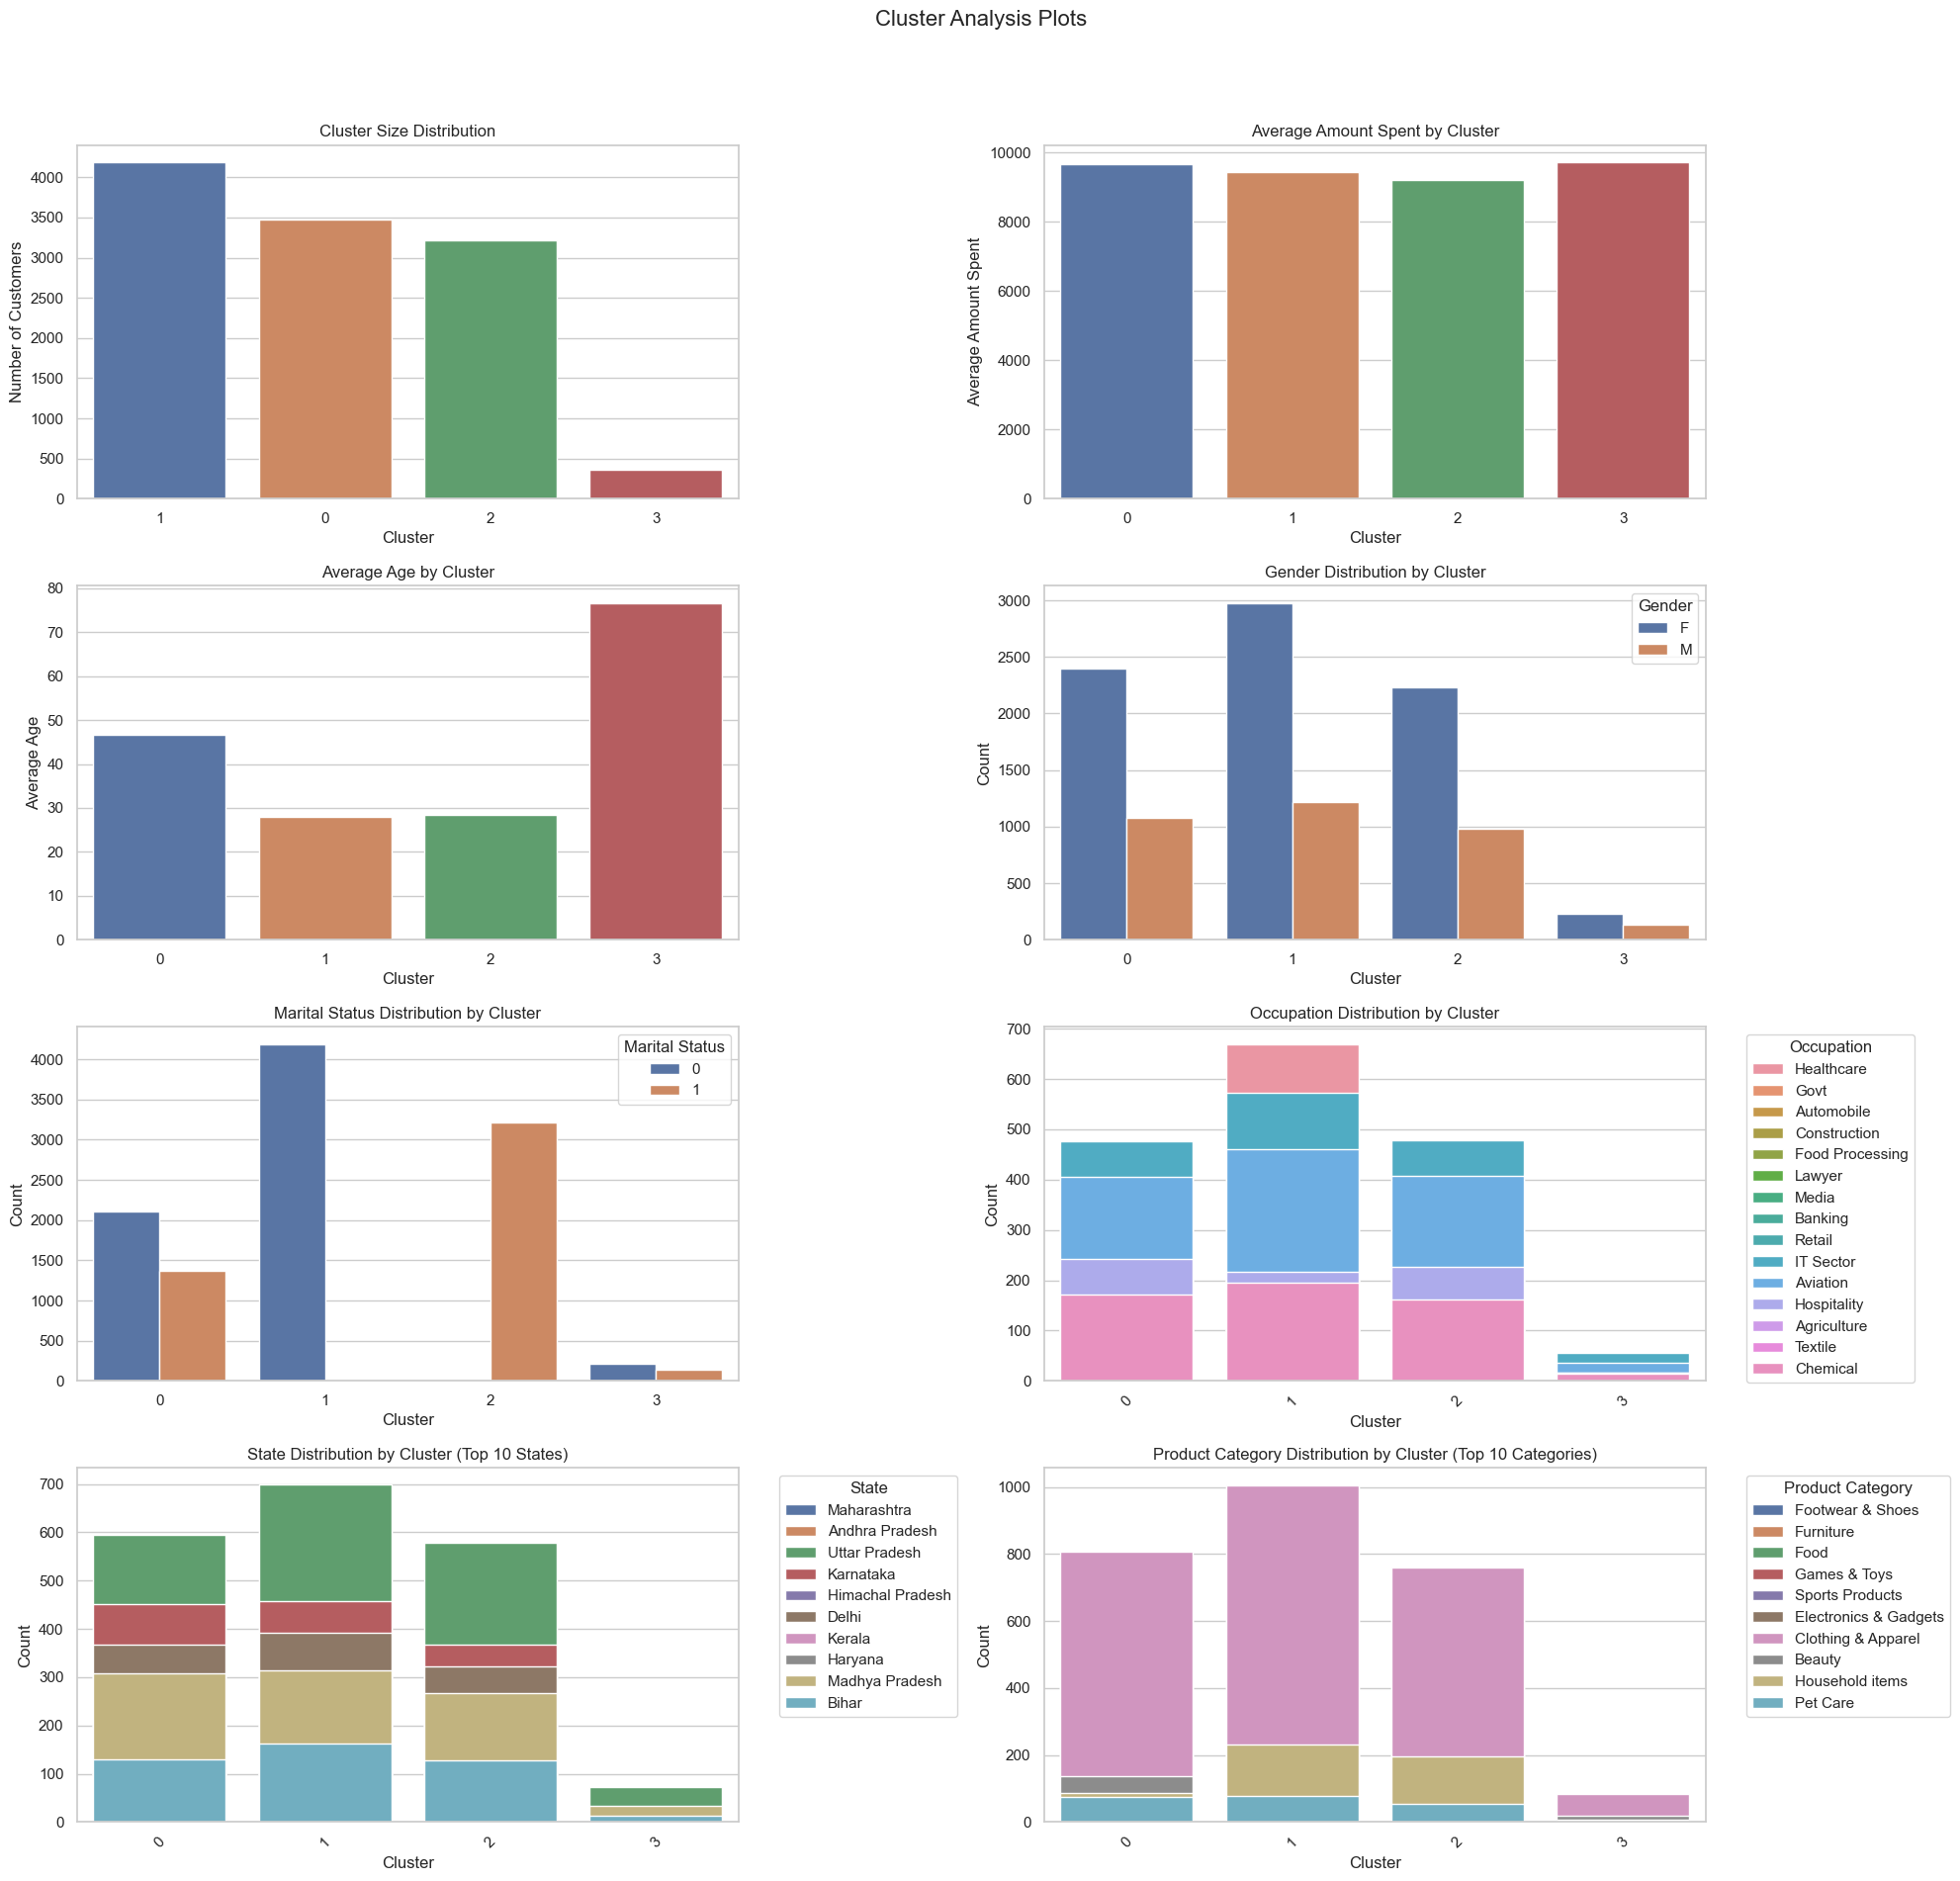

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a 4x2 grid for all the subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # Adjust size as needed
fig.suptitle("Cluster Analysis Plots", fontsize=16)

# 1. Cluster Size Distribution
sns.countplot(x=df['Demographic_Cluster'], order=df['Demographic_Cluster'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Cluster Size Distribution')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Number of Customers')

# 2. Average Amount Spent by Cluster
sns.barplot(x=amount_summary.index, y=amount_summary.values, ax=axes[0, 1])
axes[0, 1].set_title('Average Amount Spent by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Amount Spent')

# 3. Age Distribution by Cluster
sns.barplot(x=cluster_summary.index, y=cluster_summary['Age'], ax=axes[1, 0])
axes[1, 0].set_title('Average Age by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Age')

# 4. Gender Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Gender')

# 5. Marital Status Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Marital_Status', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Marital Status Distribution by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Marital Status')

# 6. Occupation Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Occupation', data=df, dodge=False, ax=axes[2, 1])
axes[2, 1].set_title('Occupation Distribution by Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# 7. State Distribution by Cluster (Top 10 States for readability)
top_states = df['State'].value_counts().index[:10]
sns.countplot(x='Demographic_Cluster', hue='State', data=df[df['State'].isin(top_states)], dodge=False, ax=axes[3, 0])
axes[3, 0].set_title('State Distribution by Cluster (Top 10 States)')
axes[3, 0].set_xlabel('Cluster')
axes[3, 0].set_ylabel('Count')
axes[3, 0].tick_params(axis='x', rotation=45)
axes[3, 0].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# 8. Product Category Distribution by Cluster (Top 10 Categories)
top_categories = df['Product_Category'].value_counts().index[:10]
sns.countplot(x='Demographic_Cluster', hue='Product_Category', data=df[df['Product_Category'].isin(top_categories)], dodge=False, ax=axes[3, 1])
axes[3, 1].set_title('Product Category Distribution by Cluster (Top 10 Categories)')
axes[3, 1].set_xlabel('Cluster')
axes[3, 1].set_ylabel('Count')
axes[3, 1].tick_params(axis='x', rotation=45)
axes[3, 1].legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
plt.show()
